In [21]:
import numpy as np
import pandas as pd
from statsmodels.tsa import seasonal
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa import api
from statsmodels.tsa import ar_model
from sklearn import metrics

from datetime import datetime
%matplotlib inline

In [2]:
df = pd.read_csv('data/southern_osc.csv', index_col=['Date'], parse_dates=['Date'], dayfirst=True)
df

,T_i
Date,
1951-01-01,1.5
1951-02-01,0.9
1951-03-01,-0.1
1951-04-01,-0.3
1951-05-01,-0.7
...,...
2019-02-01,-1.4
2019-03-01,-0.3
2019-04-01,0.1


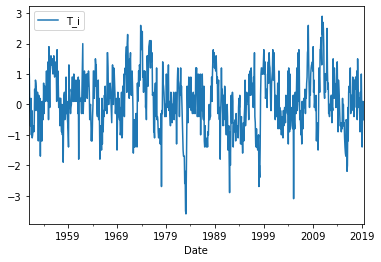

In [7]:
fig = df.plot()
#fig.set_size_inches((15, 8))
plt.show()

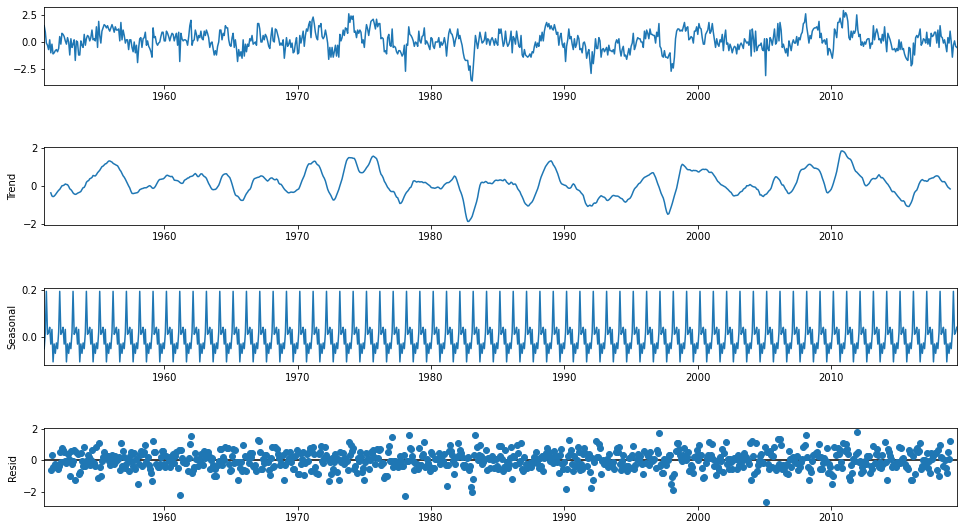

In [8]:
decomp = seasonal.seasonal_decompose(df, model='additive')
fig = decomp.plot()
fig.set_size_inches((15, 8))
plt.show()

In [9]:
test_df = df.iloc[-1]
train_df = df.iloc[:-1]

In [11]:
ses = api.SimpleExpSmoothing(train_df)
alpha = 0.7
model = ses.fit(smoothing_level=alpha, optimized=False)
exp_pred = model.forecast(1)
exp_pred

/home/vadim/anaconda3/envs/sf/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2019-06-01   -0.302693
Freq: MS, dtype: float64

In [12]:
print(test_df)

T_i   -0.5
Name: 2019-06-01 00:00:00, dtype: float64


In [13]:
def stat_test(df):
    test = sm.tsa.adfuller(df)
    print('adf: ', test[0])
    print('pvalue: ', test[1])
    print('Critical values: ', test[4])
    if test[0] > test[4]['5%']:
        print('Есть единичные корни, ряд не стационарен')
    else:
        print('Единичных корней нет, ряд стационарен')
        
stat_test(train_df)

adf:  -7.790397600107433
pvalue:  7.970501826428618e-12
Critical values:  {'1%': -3.438369485934381, '5%': -2.865079774912655, '10%': -2.5686548826226527}
Единичных корней нет, ряд стационарен


In [14]:
#otg1diff = df.diff(periods=1).dropna()

/home/vadim/anaconda3/envs/sf/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


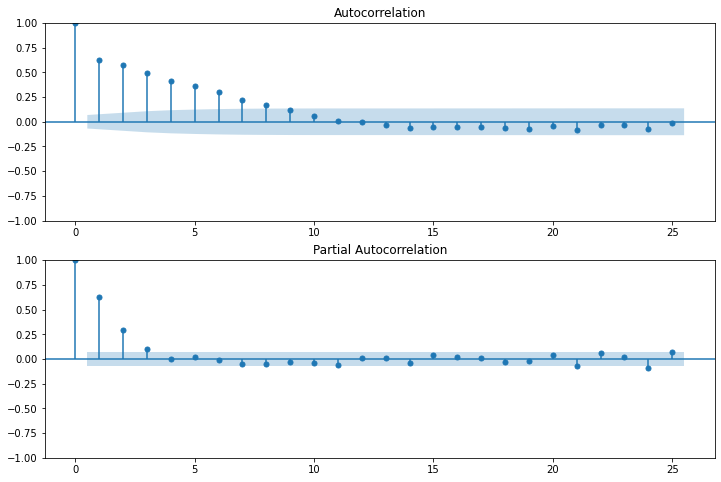

In [16]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_df.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_df, lags=25, ax=ax2)


In [18]:
p = 2

In [20]:
armodel = ar_model.AutoReg(train_df, lags=p).fit()
print(armodel.summary())

ar_pred = armodel.predict(start=len(train_df), end=len(train_df), dynamic=False)
ar_pred

                            AutoReg Model Results                             
Dep. Variable:                    T_i   No. Observations:                  821
Model:                     AutoReg(2)   Log Likelihood                -868.728
Method:               Conditional MLE   S.D. of innovations              0.699
Date:                Sun, 02 Oct 2022   AIC                           1745.455
Time:                        14:14:05   BIC                           1764.288
Sample:                    03-01-1951   HQIC                          1752.682
                         - 05-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0308      0.025      1.247      0.212      -0.018       0.079
T_i.L1         0.4405      0.033     13.194      0.000       0.375       0.506
T_i.L2         0.2961      0.033      8.881      0.0

/home/vadim/anaconda3/envs/sf/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/vadim/anaconda3/envs/sf/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


2019-06-01   -0.11579
Freq: MS, dtype: float64

In [22]:
print(metrics.mean_squared_error(test_df, exp_pred), metrics.mean_squared_error(test_df, ar_pred))

0.03892993162281572 0.14761734773997895
